In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
#from api_keys import api_key

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")
merged_df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,ICLEVEL,CONTROL,REGION,LOCALE,...,NPT4_PRIV,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,1,5,12.0,...,NaN,22667.0,NaN,0.5769,0.429326288,0.511318242,0.563870968,32750,22666.5,32600
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,1,5,12.0,...,NaN,22684.0,NaN,0.8161,0.618270079,0.673330083,0.74059293,21833,14500,42800
2,100690,Amridge University,Montgomery,AL,36117-3553,1,1,2,5,12.0,...,10155.0,13380.0,NaN,0.0909,0.43902439,0.550724638,0.679245283,22890,15500,39000
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,1,5,12.0,...,NaN,22059.0,NaN,0.8255,0.680887372,0.742248062,0.816953317,22647,16500,48300
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,1,5,12.0,...,NaN,19242.0,NaN,0.6262,0.366037736,0.442307692,0.491967872,31500,24728,27600


In [10]:
#Remove non-4 year colleges
merged_df = merged_df.loc[merged_df["ICLEVEL"] == 1]
merged_df = merged_df.reset_index()

In [11]:
#Convert PrivacySuppressed tags to NaN values
for index, row in merged_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            merged_df.iloc[index, column] = np.nan
        column += 1

In [12]:
#Convert the data columns to floats
for column in merged_df.columns[10:]:
    merged_df[column] = pd.to_numeric(merged_df[column])
merged_df.dtypes

index                 int64
UNITID                int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
MAIN                  int64
ICLEVEL               int64
CONTROL               int64
REGION                int64
LOCALE              float64
LATITUDE            float64
LONGITUDE           float64
ADM_RATE            float64
NPT4_PUB            float64
NPT4_PRIV           float64
COSTT4_A            float64
COSTT4_P            float64
RET_FT4             float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
COMPL_RPY_7YR_RT    float64
GRAD_DEBT_MDN_x     float64
GRAD_DEBT_MDN_y     float64
MD_EARN_WNE_P10     float64
dtype: object

In [18]:
merged_df.count()

index               3180
UNITID              3180
INSTNM              3180
CITY                3180
STABBR              3180
ZIP                 3180
MAIN                3180
ICLEVEL             3180
CONTROL             3180
REGION              3180
LOCALE              2914
LATITUDE            2914
LONGITUDE           2914
ADM_RATE            1765
NPT4_PUB             707
NPT4_PRIV           1637
COSTT4_A            2314
COSTT4_P              31
RET_FT4             2169
COMPL_RPY_3YR_RT    2559
COMPL_RPY_5YR_RT    2496
COMPL_RPY_7YR_RT    2348
GRAD_DEBT_MDN_x     2673
GRAD_DEBT_MDN_y     2208
MD_EARN_WNE_P10     2225
dtype: int64

In [17]:
#Create a smaller sample to test with
test_df = merged_df.sample(n=400)
test_df = test_df.reset_index()
test_df.head()

,level_0,index,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,ICLEVEL,CONTROL,...,NPT4_PRIV,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,1790,3239,217484,University of Rhode Island,Kingston,RI,2881,1,1,1,...,NaN,27552.0,NaN,0.8318,0.783140,0.841732,0.875686,23000.0,16000.0,48900.0
1,464,876,141264,Valdosta State University,Valdosta,GA,31698,1,1,1,...,NaN,21191.0,NaN,0.7095,0.535679,0.646636,0.703843,25000.0,15000.0,39200.0
2,1774,3215,216667,Washington & Jefferson College,Washington,PA,15301,1,1,2,...,26222.0,55751.0,NaN,0.8560,0.842105,0.874494,0.913366,27000.0,20558.5,50200.0
3,2686,5829,459091,Broadview Entertainment Arts University,Salt Lake City,UT,84115,0,1,3,...,19198.0,24867.0,NaN,0.5556,0.468750,0.570796,0.659763,10500.0,NaN,NaN
4,1829,3306,218973,Wofford College,Spartanburg,SC,29303-3663,1,1,2,...,24083.0,53305.0,NaN,0.8575,0.836502,0.889796,0.903409,26000.0,17125.0,48300.0


In [21]:
public_df = test_df.loc[test_df["CONTROL"]==1]
nonprofit_df = test_df.loc[test_df["CONTROL"]==2]
forprofit_df = test_df.loc[test_df["CONTROL"]==3]

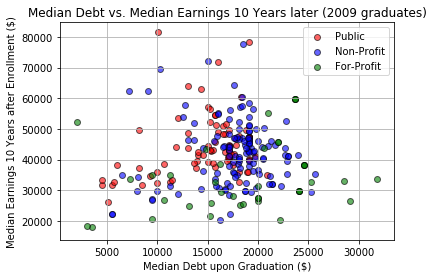

In [22]:
plt.scatter(public_df["GRAD_DEBT_MDN_y"], public_df["MD_EARN_WNE_P10"], 
           label="Public", color="r", edgecolors="k", alpha=0.6)
plt.scatter(nonprofit_df["GRAD_DEBT_MDN_y"], nonprofit_df["MD_EARN_WNE_P10"],
           label="Non-Profit", color="b", edgecolors="k", alpha=0.6)
plt.scatter(forprofit_df["GRAD_DEBT_MDN_y"], forprofit_df["MD_EARN_WNE_P10"],
           label="For-Profit", color="g", edgecolors="k", alpha=0.6)
plt.ylabel("Median Earnings 10 Years after Enrollment ($)")
plt.xlabel("Median Debt upon Graduation ($)")
plt.title("Median Debt vs. Median Earnings 10 Years later (2009 graduates)")
plt.grid()
plt.legend()